In [10]:
import fastf1
import pandas as pd
import numpy as np
from datetime import timedelta
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [11]:
# Enable FastF1 cache
cache_dir = "/content/f1_cache"
os.makedirs(cache_dir, exist_ok=True)
fastf1.Cache.enable_cache(cache_dir)

print("Cache enabled at:", cache_dir)


Cache enabled at: /content/f1_cache


In [12]:
# List of drivers for the 2025 season
drivers_2025 = [
    'VER', 'LAW', 'HAM', 'LEC', 'NOR', 'PIA', 'RUS', 'ANT', 
    'ALO', 'STR', 'OCO', 'BEA', 'HUL', 'BOR', 'GAS', 'DOO', 
    'TSU', 'HAD', 'ALB', 'SAI'
]


In [20]:
def race_results(drivers):
    years = [2022, 2023, 2024]
    df = pd.DataFrame({'Driver': drivers})

    for year in years:
        try:
            event = fastf1.get_event(year, 'Japan')
            race = event.get_session('R')
            race.load()

            classification = race.results.set_index('Abbreviation')

            positions, total_times, avg_lap_times = [], [], []

            for driver in drivers:
                if driver in classification.index:
                    pos = classification.at[driver, 'Position']
                    total_time = classification.at[driver, 'Time']
                    total_seconds = total_time.total_seconds() if isinstance(total_time, timedelta) else 0

                    laps = race.laps.pick_driver(driver)
                    avg_lap = laps['LapTime'].dropna().mean()
                    avg_lap_sec = avg_lap.total_seconds() if pd.notnull(avg_lap) else 0
                else:
                    pos = None
                    total_seconds = 0
                    avg_lap_sec = 0

                positions.append(pos)
                total_times.append(total_seconds)
                avg_lap_times.append(avg_lap_sec)

            df[f'pos_{year}'] = positions
            df[f'time_{year}'] = total_times
            df[f'avg_{year}'] = avg_lap_times

        except Exception as e:
            print(f"Error loading Japanese GP data for {year}: {e}")
            df[f'pos_{year}'] = [None] * len(drivers)
            df[f'time_{year}'] = [0] * len(drivers)
            df[f'avg_{year}'] = [0] * len(drivers)

    return df


In [21]:
# Fetch past race data
drivers_df = race_results(drivers_2025)

# Show the data
drivers_df


core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '31', '44', '5', '14', '63', '6', '4', '3', '18', '22', '20', '77', '24', '47', '10', '55', '23']
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.

,Driver,pos_2022,time_2022,avg_2022,pos_2023,time_2023,avg_2023,pos_2024,time_2024,avg_2024
0,VER,1.0,10904.004,109.074291,1.0,5458.421,99.060160,1.0,6863.566,97.637509
1,LAW,NaN,0.000,0.000000,11.0,3.089,101.392979,NaN,0.000,0.000000
2,HAM,5.0,40.326,111.226708,5.0,49.376,100.208780,9.0,48.626,98.922862
3,LEC,3.0,31.763,110.268083,4.0,43.998,100.036760,4.0,26.522,98.537588
4,NOR,10.0,70.782,113.002666,2.0,19.387,99.495700,5.0,29.700,98.261392
5,PIA,NaN,0.000,0.000000,3.0,36.494,99.857900,8.0,47.525,98.760941
6,RUS,8.0,47.661,111.736208,7.0,57.659,100.415620,7.0,45.951,98.978901
7,ANT,NaN,0.000,0.000000,NaN,0.000,0.000000,NaN,0.000,0.000000
8,ALO,7.0,46.369,111.571750,8.0,74.725,100.684940,6.0,44.272,98.639313
9,STR,12.0,73.904,113.059875,18.0,0.000,104.807529,12.0,11.233,101.298843


In [15]:
def train_and_predict(df):
    """
    Trains a Random Forest model to predict 2025 Japanese GP positions.
    """
    # Features: all numeric race data
    features = df[['pos_2022', 'time_2022', 'avg_2022', 
                   'pos_2023', 'time_2023', 'avg_2023', 
                   'pos_2024', 'time_2024', 'avg_2024']]

    target = df[['pos_2024']] 
    # Replace missing values 
    features = features.fillna(50)
    target = target.fillna(50)

    # Build a simple pipeline (scaling + Random Forest)
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Train model
    model.fit(features, target.values.ravel())

    # Predict 
    preds = model.predict(features)

    # Build a prediction DataFrame
    pred_df = pd.DataFrame({
        'Driver': df['Driver'],
        'Predicted_Score_2025': preds
    }).sort_values(by='Predicted_Score_2025')

    pred_df['Predicted_Position_2025'] = np.arange(1, len(pred_df) + 1)

    return pred_df[['Driver', 'Predicted_Position_2025']]


In [16]:
prediction_2025_ml = train_and_predict(drivers_df)

prediction_2025_ml


,Driver,Predicted_Position_2025
0,VER,1
2,HAM,2
6,RUS,3
3,LEC,4
4,NOR,5
19,SAI,6
10,OCO,7
14,GAS,8
5,PIA,9
8,ALO,10


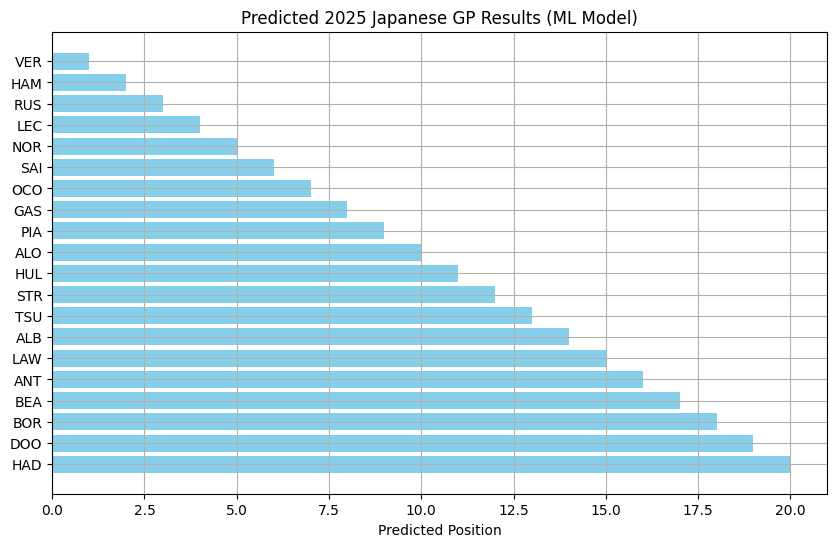

In [17]:
import matplotlib.pyplot as plt

# Plot predictions
plt.figure(figsize=(10,6))
plt.barh(prediction_2025_ml['Driver'], prediction_2025_ml['Predicted_Position_2025'], color='skyblue')
plt.xlabel('Predicted Position')
plt.title('Predicted 2025 Japanese GP Results (ML Model)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
